In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('Trim_feature_Loan_2007_2018Q4.csv')
df.shape

(1345310, 31)

In [27]:
df.isnull().sum()

id                          0
loan_status                 0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
issue_d                     0
purpose                     0
title                   16659
application_type            0
initial_list_status         0
emp_title               85785
emp_length              78511
zip_code                    1
addr_state                  0
home_ownership              0
annual_inc                  0
verification_status         0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
mort_acc                47281
pub_rec_bankruptcies      697
fico_range_high             0
fico_range_low              0
dtype: int64

In [28]:
df['emp_length'].fillna('< 1 year', inplace= True)
df['dti'].fillna(0, inplace= True)
df['revol_util'].fillna(0, inplace= True)
df['mort_acc'].fillna(0, inplace= True)

In [29]:
df.isnull().sum()

id                          0
loan_status                 0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
issue_d                     0
purpose                     0
title                   16659
application_type            0
initial_list_status         0
emp_title               85785
emp_length                  0
zip_code                    1
addr_state                  0
home_ownership              0
annual_inc                  0
verification_status         0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
mort_acc                    0
pub_rec_bankruptcies      697
fico_range_high             0
fico_range_low              0
dtype: int64

In [30]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [31]:
def IQR_bound(name_column):
    IQR = df[name_column].quantile(0.75) - df[name_column].quantile(0.25)
    upper_bridge = df[name_column].quantile(0.75) + (IQR * 1.5)
    lower_bridge = df[name_column].quantile(0.25) - (IQR * 1.5)

    return upper_bridge, lower_bridge

IQR_bound('annual_inc')

(156330.0, -20550.0)

<AxesSubplot:xlabel='annual_inc'>

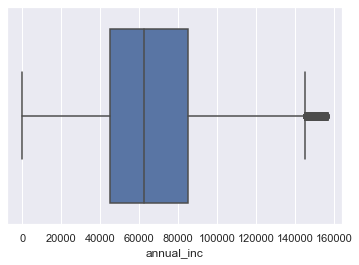

In [32]:
inc_upper_bound, inc_lower_bound = IQR_bound('annual_inc')
sns.boxplot(df[(df['annual_inc'] > inc_lower_bound) & (df['annual_inc'] < inc_upper_bound)]['annual_inc'])

<AxesSubplot:xlabel='dti'>

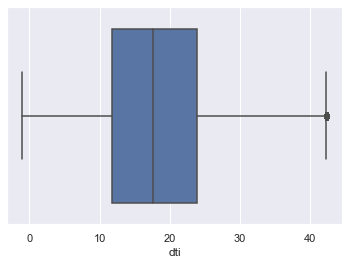

In [33]:
dti_upper_bound, dti_lower_bound = IQR_bound('dti')
sns.boxplot(df[(df['dti'] > dti_lower_bound) & (df['dti'] < dti_upper_bound)]['dti'])

In [34]:
remove_outliner_df = df[(df['annual_inc'] > inc_lower_bound) & (df['annual_inc'] < inc_upper_bound)]
remove_outliner_df = df[(df['dti'] > dti_lower_bound) & (df['dti'] < dti_upper_bound)]
remove_outliner_df.shape[0] / df.shape[0]

0.9959176695334161

In [35]:
# Only lost 0.5% rows of original dataset

In [36]:
def emp_role(x):
    if x in ['< 1 year']:
        return 'Intern'
    elif x in ['1 year', '2 years']:
        return 'Junior'
    elif x in ['3 years', '4 years', '5 years']:
        return 'Middle Senior'
    elif x in ['6 years', '7 years', '8 years', '9 years']:
        return 'Senior'
    else:
        return 'Expert'

remove_outliner_df['emp_role'] = remove_outliner_df['emp_length'].apply(emp_role)

In [37]:
# Encode

In [38]:
remove_outliner_df['y'] = remove_outliner_df['loan_status'].apply(lambda x:1 if x == 'Charged Off' else 0)

In [39]:
remove_outliner_df.drop(['id', 'loan_status', 'installment','grade', 'issue_d', 'title', 'emp_length', 'emp_title','initial_list_status', 'zip_code', 'pub_rec_bankruptcies', 'fico_range_low', 'application_type','earliest_cr_line', 'open_acc'], axis= 1, inplace = True)

In [40]:
remove_outliner_df

,loan_amnt,term,int_rate,sub_grade,purpose,addr_state,home_ownership,annual_inc,verification_status,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,fico_range_high,emp_role,y
0,3600.0,36 months,13.99,C4,debt_consolidation,PA,MORTGAGE,55000.0,Not Verified,5.91,0.0,2765.0,29.7,13.0,1.0,679.0,Expert,0
1,24700.0,36 months,11.99,C1,small_business,SD,MORTGAGE,65000.0,Not Verified,16.06,0.0,21470.0,19.2,38.0,4.0,719.0,Expert,0
2,20000.0,60 months,10.78,B4,home_improvement,IL,MORTGAGE,63000.0,Not Verified,10.78,0.0,7869.0,56.2,18.0,5.0,699.0,Expert,0
3,10400.0,60 months,22.45,F1,major_purchase,PA,MORTGAGE,104433.0,Source Verified,25.38,0.0,21929.0,64.5,35.0,6.0,699.0,Middle Senior,0
4,11950.0,36 months,13.44,C3,debt_consolidation,GA,RENT,34000.0,Source Verified,10.20,0.0,8822.0,68.4,6.0,0.0,694.0,Middle Senior,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,60 months,9.49,B2,home_improvement,TX,OWN,130000.0,Not Verified,20.60,0.0,23833.0,34.0,39.0,3.0,739.0,Middle Senior,0
1345306,29400.0,60 months,13.99,C3,debt_consolidation,CA,MORTGAGE,180792.0,Not Verified,22.03,0.0,77480.0,85.2,32.0,3.0,709.0,Senior,0
1345307,32000.0,60 months,14.49,C4,home_improvement,AZ,MORTGAGE,157000.0,Source Verified,10.34,0.0,111598.0,27.4,18.0,3.0,739.0,Middle Senior,1
1345308,16000.0,60 months,12.79,C1,medical,NC,RENT,150000.0,Not Verified,12.25,4.0,7700.0,55.0,28.0,0.0,669.0,Expert,0


In [41]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [42]:
one_hot_encoding_columns = ['purpose', 'addr_state', 'home_ownership', 'verification_status', 'sub_grade']
ordinal_encoding_columns = ['term',  'emp_role']
min_max_scalers_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'fico_range_high']

In [43]:
df_encode = pd.get_dummies(remove_outliner_df, columns=one_hot_encoding_columns, prefix=one_hot_encoding_columns, prefix_sep= '_', drop_first=True)
df_encode

,loan_amnt,term,int_rate,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,3600.0,36 months,13.99,55000.0,5.91,0.0,2765.0,29.7,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,36 months,11.99,65000.0,16.06,0.0,21470.0,19.2,38.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,60 months,10.78,63000.0,10.78,0.0,7869.0,56.2,18.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,10400.0,60 months,22.45,104433.0,25.38,0.0,21929.0,64.5,35.0,6.0,...,1,0,0,0,0,0,0,0,0,0
4,11950.0,36 months,13.44,34000.0,10.20,0.0,8822.0,68.4,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,60 months,9.49,130000.0,20.60,0.0,23833.0,34.0,39.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345306,29400.0,60 months,13.99,180792.0,22.03,0.0,77480.0,85.2,32.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345307,32000.0,60 months,14.49,157000.0,10.34,0.0,111598.0,27.4,18.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345308,16000.0,60 months,12.79,150000.0,12.25,4.0,7700.0,55.0,28.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
for col in min_max_scalers_columns:
    df_encode[col] = MinMaxScaler().fit_transform(remove_outliner_df[[col]])

In [45]:
df_encode['term'] = OrdinalEncoder().fit_transform(remove_outliner_df[['term']])

In [46]:
df_encode['emp_role'] = OrdinalEncoder(categories= [['Intern','Junior','Middle Senior','Senior','Expert']]).fit_transform(remove_outliner_df[['emp_role']])

In [47]:
df_encode

,loan_amnt,term,int_rate,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,0.078481,0.0,0.338138,0.005000,0.159217,0.0,0.000952,29.7,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.612658,0.0,0.260226,0.005910,0.393088,0.0,0.007391,19.2,38.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,0.493671,1.0,0.213089,0.005728,0.271429,0.0,0.002709,56.2,18.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,0.250633,1.0,0.667705,0.009495,0.607834,0.0,0.007549,64.5,35.0,6.0,...,1,0,0,0,0,0,0,0,0,0
4,0.289873,0.0,0.316712,0.003091,0.258065,0.0,0.003037,68.4,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,0.443038,1.0,0.162836,0.011819,0.497696,0.0,0.008205,34.0,39.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345306,0.731646,1.0,0.338138,0.016437,0.530645,0.0,0.026673,85.2,32.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345307,0.797468,1.0,0.357616,0.014274,0.261290,0.0,0.038418,27.4,18.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1345308,0.392405,1.0,0.291391,0.013637,0.305300,4.0,0.002651,55.0,28.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_encode.to_csv('train_test.csv',index= False)